In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#TODO: øk font size på plot

In [3]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [5]:
X.shape

(442, 10)

In [6]:
y.shape

(442,)

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [9]:
def plot_data(X,y):
    X_copy = X.copy()
    X_copy["target"] = y
    sns.pairplot(X_copy, hue = "target")
    plt.show()

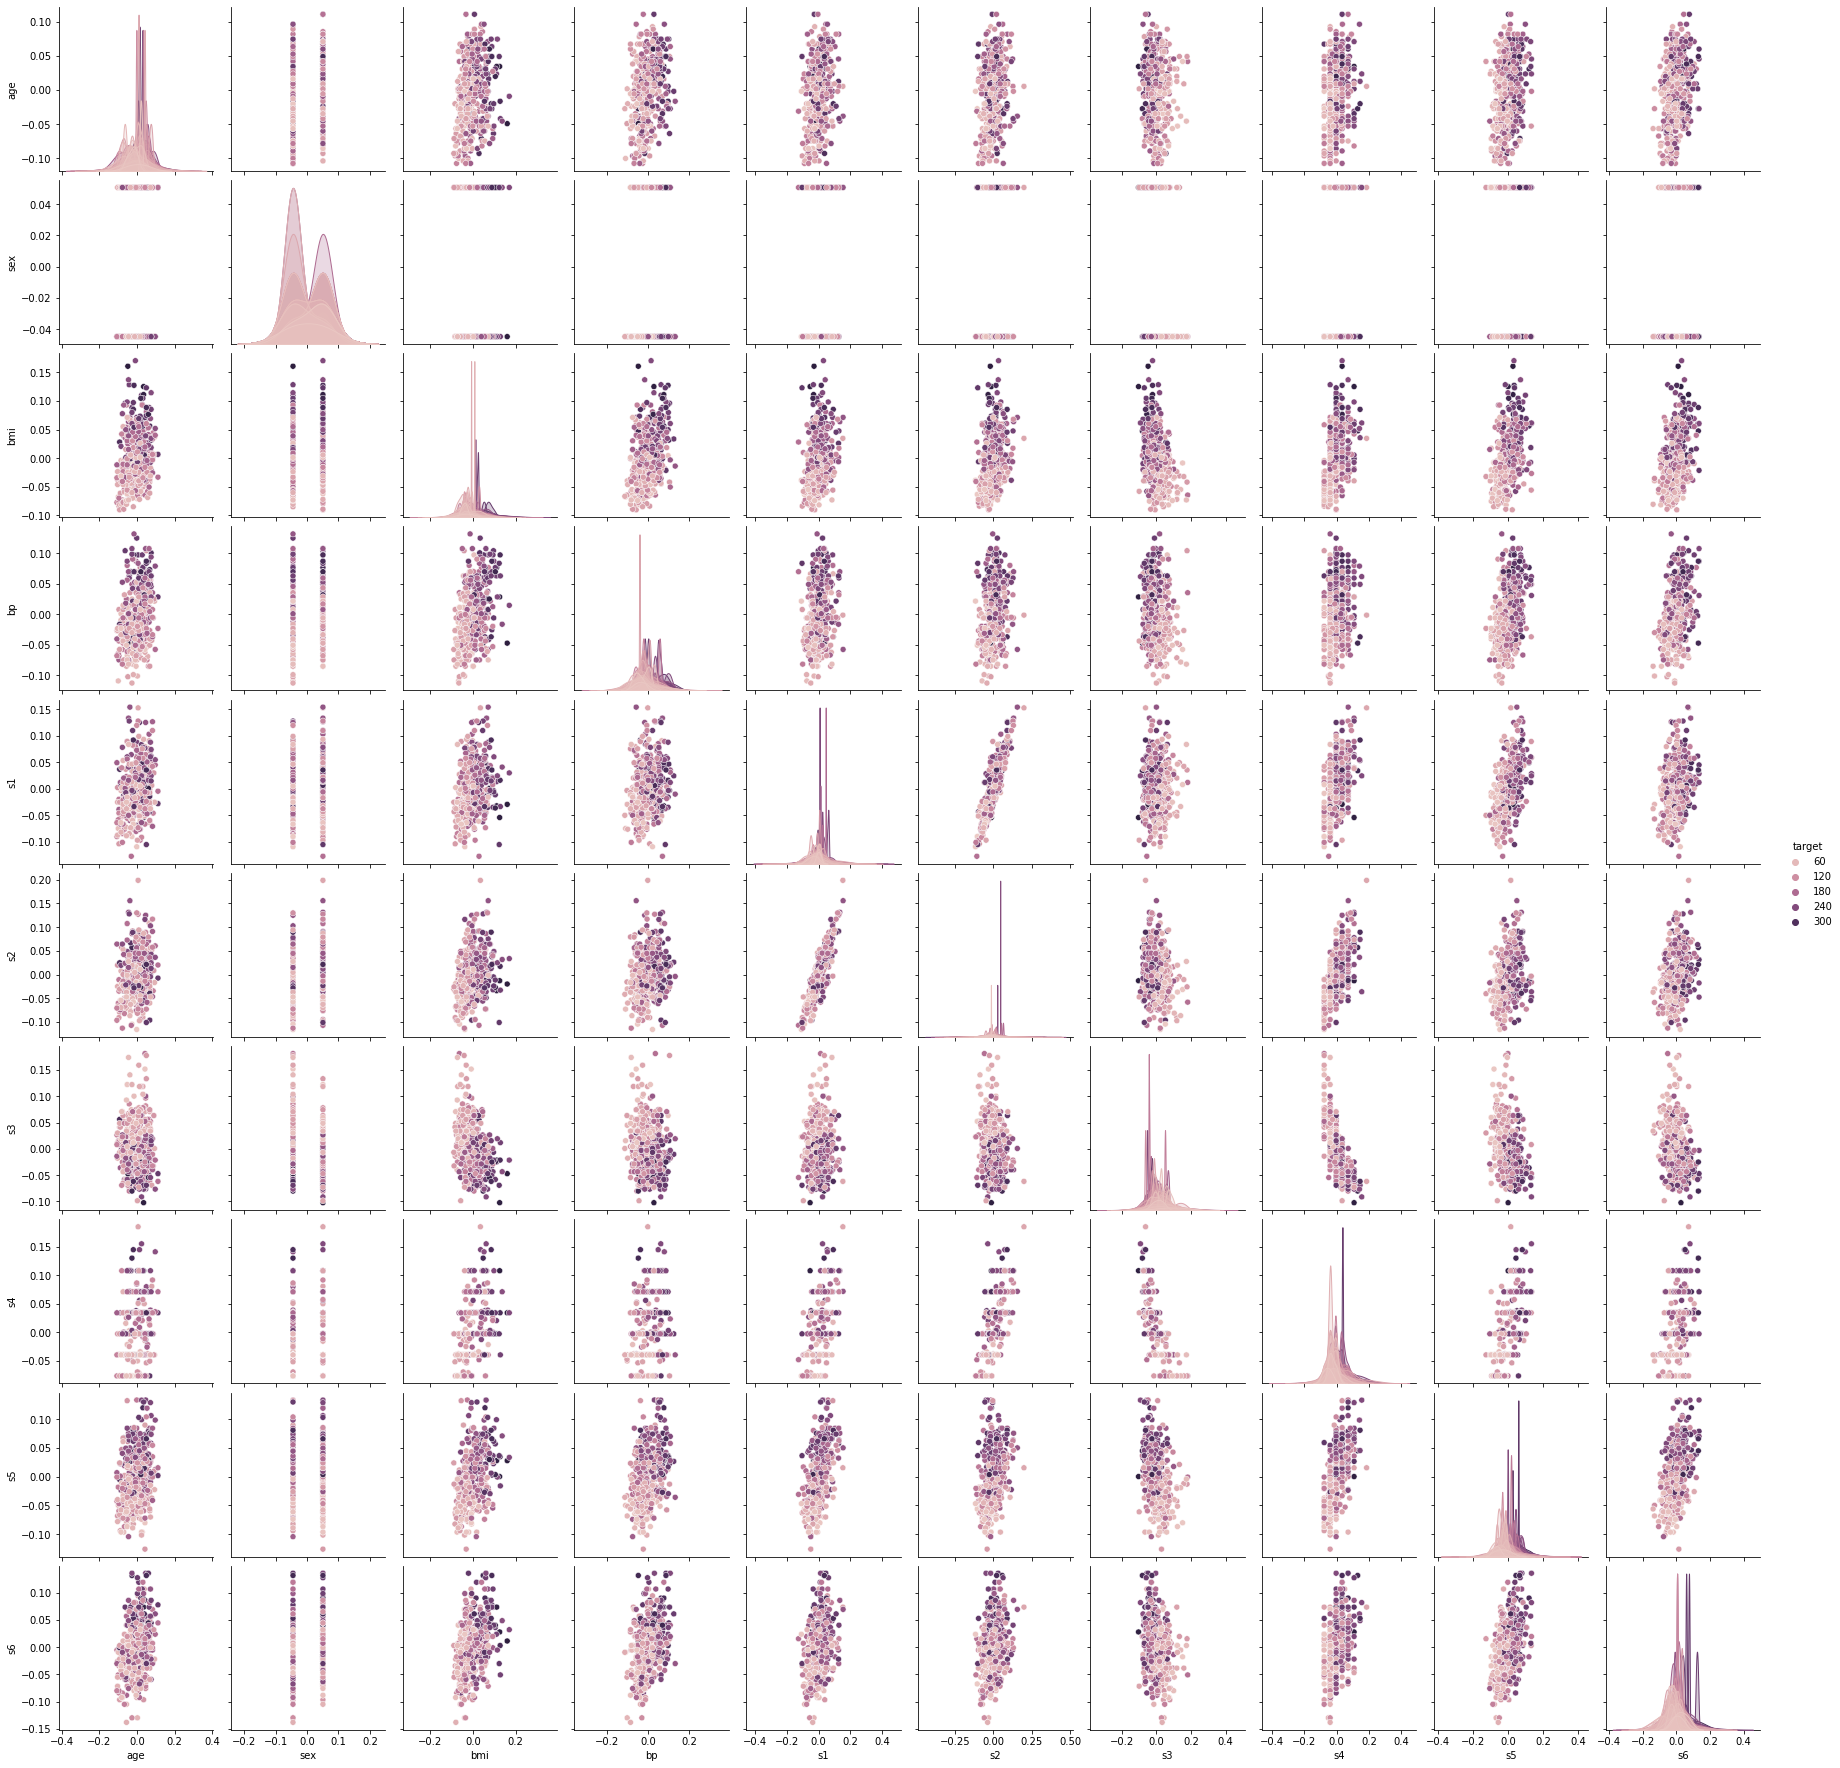

In [10]:
plot_data(X,y)

In [11]:
def plot_correlation_matrix(X,y):
    X_copy = X.copy()
    X_copy["target"] = y
    plt.figure(figsize=(10,10))
    sns.heatmap(X_copy.corr(), annot=True) #TODO: mask halve matrisen
    plt.show()

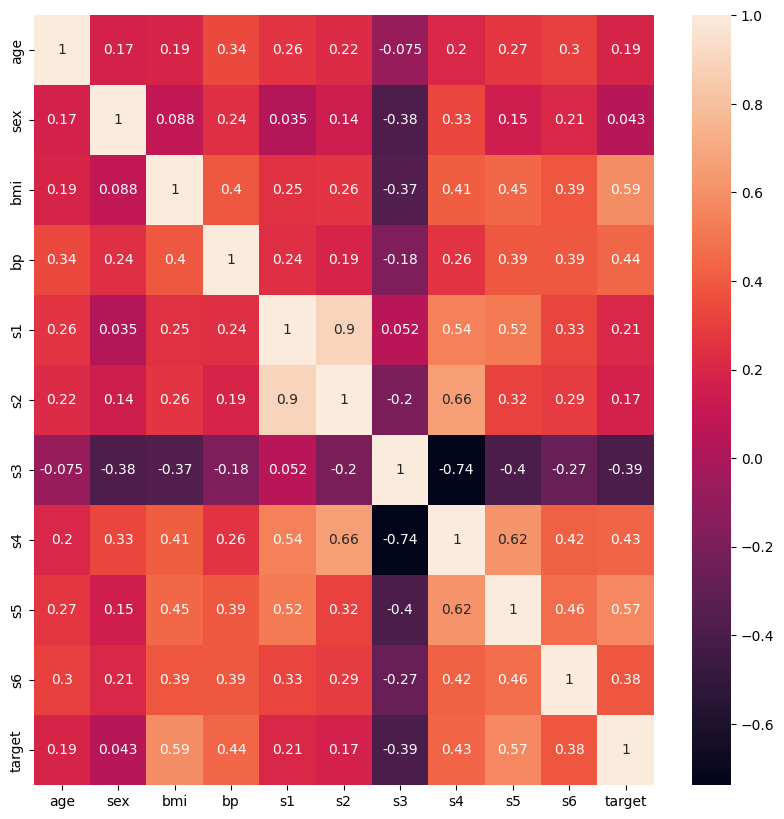

In [12]:
plot_correlation_matrix(X,y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=round((0.15 / 0.75),1), random_state=42)

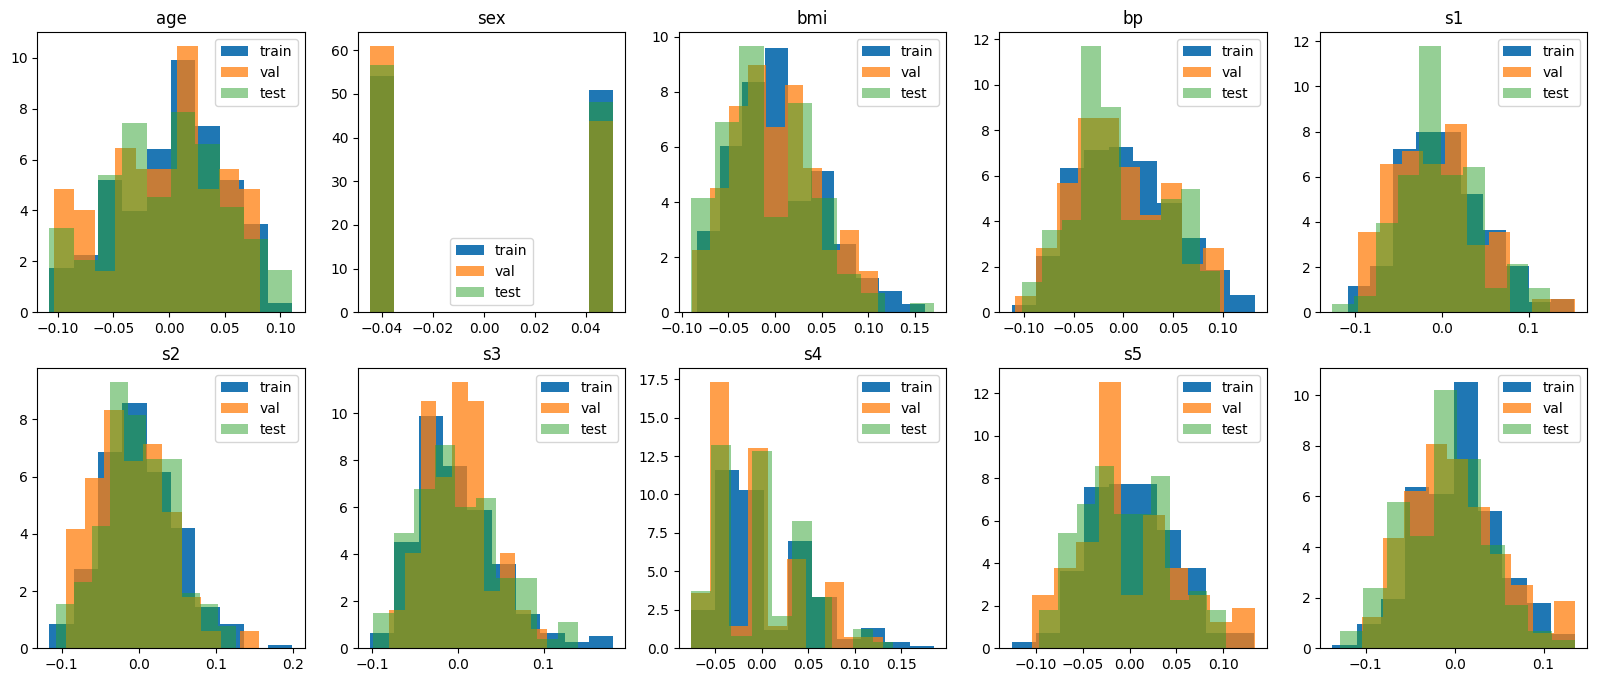

In [16]:
#TODO: plot normaliserte histogram
plt.figure(figsize=(20,8))
for i in range(X_train.shape[1]):
    plt.title(X_train.columns[i-1])
    plt.subplot(2,5,i+1)
    plt.hist(X_train.iloc[:,i], density=True, color="C0", label="train")
    plt.hist(X_val.iloc[:,i], density=True, color="C1", alpha=0.75, label="val")
    plt.hist(X_test.iloc[:,i], density=True, color="C2", alpha=0.5, label="test")
    plt.legend()
plt.show()    

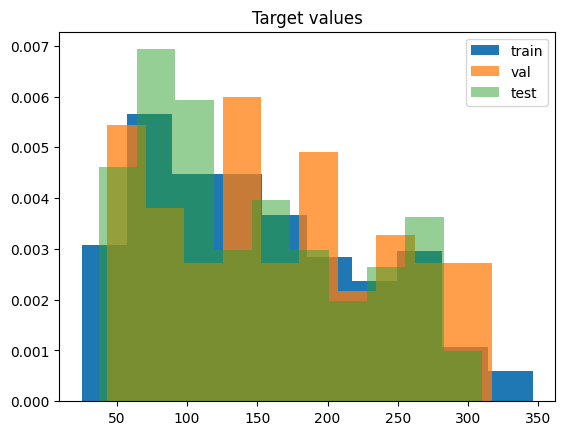

In [31]:
plt.title("Target values")
plt.hist(y_train, density=True, color="C0", label="train")
plt.hist(y_val, density=True, color="C1", alpha=0.75, label="val")
plt.hist(y_test, density=True, color="C2", alpha=0.5, label="test")
plt.legend()
plt.show()    

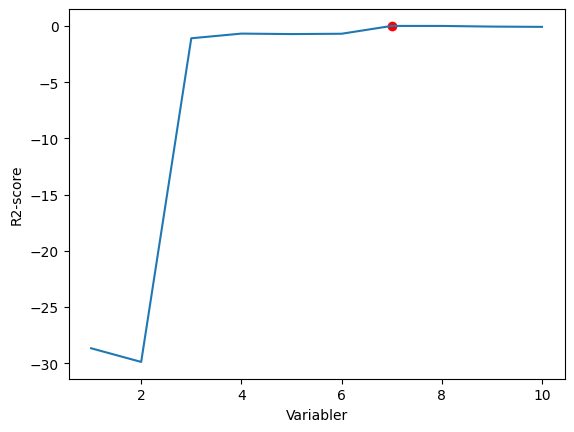

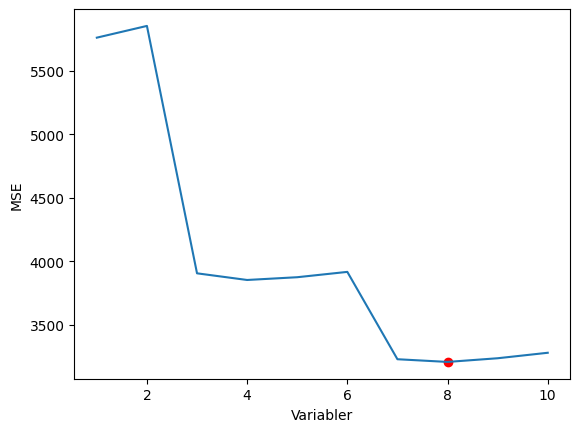

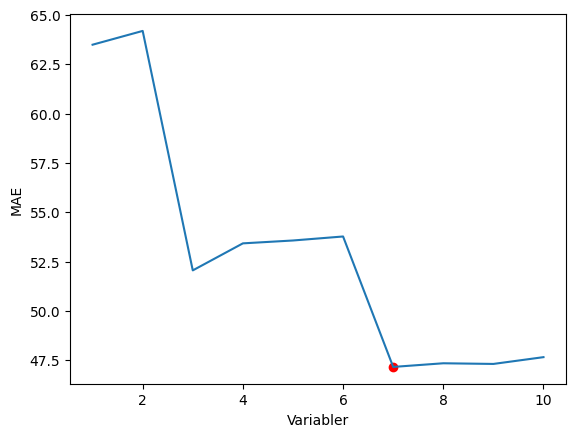

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error
#train models
scores = np.empty((3,10))
for i in range(X_train.shape[1]):
    linreg = LinearRegression()
    linreg.fit(X_train.iloc[:,:i+1],y_train)
    
    y_val_hat = linreg.predict(X_val.iloc[:,:i+1])
    #print(f"Ytelse på valideringssettet basert på de {i+1} første av {X_train.shape[1]} variabler")
    #print("R2-score: " ,r2_score(y_val_hat,y_val))
    #print("MSE: ", mean_squared_error(y_val_hat,y_val))
    #print("MAE: ", mean_absolute_error(y_val_hat,y_val))
    #print("----------------------------------")
    scores[:,i] = r2_score(y_val_hat,y_val), mean_squared_error(y_val_hat,y_val), mean_absolute_error(y_val_hat,y_val)

score_names = ["R2-score", "MSE", "MAE"]
for num, metric_val in enumerate(scores):
    plt.plot(np.arange(1,X_train.shape[1]+1),metric_val)
    plt.ylabel(score_names[num])
    plt.xlabel("Variabler")
    if score_names[num] == "R2-score":
        plt.scatter(metric_val.argmax()+1,metric_val.max(),color="r")
    else:
        plt.scatter(metric_val.argmin()+1,metric_val.min(),color="r")
    plt.show()


Vi har nå funnet den beste modellen hva gjelder ytelse på valideringssettet og velger denne "konfigurasjonen" videre for test på testsettet.

Før vi går videre gjentar vi bare forsøket en gang til med 9 variable

In [19]:
linreg = LinearRegression()
linreg.fit(X_train.iloc[:,:9],y_train)

y_train_hat = linreg.predict(X_train.iloc[:,:9])
y_val_hat = linreg.predict(X_val.iloc[:,:9])

print("Scoring på treningsdata:")
print("R2-score: " ,r2_score(y_train_hat,y_train))
print("MSE: ", mean_squared_error(y_train_hat,y_train))
print("MAE: ", mean_absolute_error(y_train_hat,y_train))
print("\n")
print("Scoring på valideringsdata:")
print("R2-score: " ,r2_score(y_val_hat,y_val))
print("MSE: ", mean_squared_error(y_val_hat,y_val))
print("MAE: ", mean_absolute_error(y_val_hat,y_val))


Scoring på treningsdata:
R2-score:  0.08202693843045872
MSE:  2874.6762858346656
MAE:  43.33461522322724


Scoring på valideringsdata:
R2-score:  -0.0478896045012045
MSE:  3237.731412022182
MAE:  47.31628408236401


Nå som vi har funnet den optimale konfigurasjonen kan man velge å slå trening og valideringssettet sammen

In [20]:
X_dev = pd.concat([X_train,X_val])

In [21]:
y_dev = np.hstack([y_train, y_val])

In [22]:
linreg = LinearRegression()
linreg.fit(X_dev.iloc[:,:9],y_dev)
y_test_hat = linreg.predict(X_test.iloc[:,:9])

print("Scoring på testdata:")
print("R2-score: " ,r2_score(y_test_hat,y_test))
print("MSE: ", mean_squared_error(y_test_hat,y_test))
print("MAE: ", mean_absolute_error(y_test_hat,y_test))

Scoring på testdata:
R2-score:  0.09469126987712273
MSE:  2863.4521084860075
MAE:  41.576222311399476


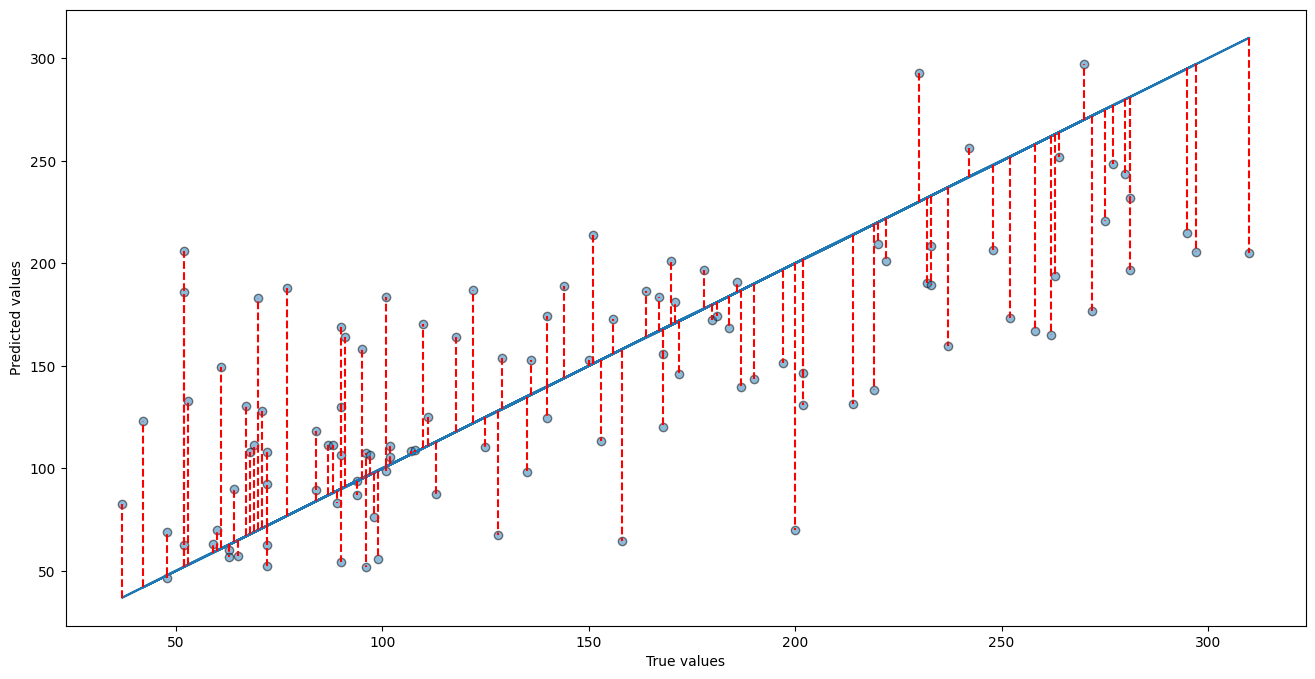

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_test_hat, color="C0", alpha=0.5, edgecolors="black")
plt.plot(y_test,y_test, color="C0")
plt.vlines(y_test,ymin=y_test ,ymax=y_test_hat, color="red", linestyles="--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [24]:
linreg.coef_.shape

(9,)

In [25]:
linreg.intercept_

151.7212059056578

### En liten tilleggsopplysning:

Legg merke til variasjonen i ytelse 

In [26]:
scores_train = np.empty((100,3))
scores_val = np.empty((100,3))
model_coef = np.empty((100,9))
model_intercept = np.empty((100,1))
for i in range(100):
    linreg = LinearRegression()
    linreg.fit(X_train.iloc[:,:9],y_train)
    
    model_coef[i] = linreg.coef_
    model_intercept[i] = linreg.intercept_
    
    y_train_hat = linreg.predict(X_train.iloc[:,:9])
    y_val_hat = linreg.predict(X_val.iloc[:,:9])
    
    scores_train[i] = r2_score(y_train_hat,y_train), mean_squared_error(y_train_hat,y_train), mean_absolute_error(y_train_hat,y_train)
    scores_val[i] = r2_score(y_val_hat,y_val), mean_squared_error(y_val_hat,y_val), mean_absolute_error(y_val_hat,y_val)

In [27]:
scores_train.std(axis=0)

array([6.93889390e-17, 0.00000000e+00, 9.23705556e-14])

In [28]:
scores_val.std(axis=0)

array([1.24900090e-16, 4.54747351e-13, 1.42108547e-14])

In [29]:
model_coef.std(axis=0)

array([4.97379915e-14, 1.98951966e-13, 5.68434189e-13, 1.70530257e-13,
       1.81898940e-12, 9.09494702e-13, 1.13686838e-13, 4.54747351e-13,
       7.95807864e-13])

In [30]:
model_intercept.std()

0.0

Hverken modelparametre eller ytelse varier noen ting. Gitt den samme dataen er lineær regresjon, m/OLS som målfunksjon, et deterministisk system. Dette er kanskje ikke noe overraskelse, men vi skal senere få se at for de fleste maskinlæringsmodeller så må vi ta hensyn til at ytelsen til modellen kan variere fra gang til gang, til tross for at treningsdata og andre parametre holdes likt. 